# Dog breed Classifier

This file consists of CNN for the 2nd module of the proposed approach.
I.e. this the Multi class classifier.

This file also contains the method to test the image, which integrates the binary classifier and multi class classifier. 

In [67]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from timeit import default_timer as timer
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from keras.callbacks import History 
history = History()
acc=[]
loss=[]
val_loss=[]
val_acc=[]

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from IPython.display import display, Image,HTML
from keras.models import model_from_yaml

### Build the Model.

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# number of features - 32,64,128 , size of each feaature map (3,3)
# Input shape -> 3 for colored, 2 for black and white, size - 64,64 
#activation function - to remove the negative pixel values , to remove the linearity 
# classifier.add(GlobalAveragePooling2D(input_shape=train_ResNet50.shape[1:]))

classifier.add(Conv2D(64, (3, 3), activation="relu", input_shape=(64, 64, 3)))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(activation = 'relu', units = 64))

# activation - softmax for more than 2 classes, sigmoid - 2 classes
classifier.add(Dense(activation = 'softmax', units = 133))

# Compiling the CNN
# binary_class = binary_crossentropy, multi - categorical_crossentropy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

As we can see we are using **Sequential** class from Keras models to build the CNN.
Here we have 3 layers of convolution and a layer of Max pooling for each convolution layer.

We then flatten the nodes and feed it to the fully connected layers.
we have 2 fully connected layers, one uses '**relu**' as the activation function and other uses '**softmax**'.

We have chosen '**adam optimizer**' as the optimizer and '**Caategorical crossentropy**' as the loss function.

### Model Summary :

In [183]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

Since we don't have enough images lets create some more images from the existing images and modifying some properties using Keras **ImageDataGenerator**.

In [3]:
# Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
# class_mode = binary or categorical, target_size = same as input_size mentioned in Convo2D step
training_set = train_datagen.flow_from_directory('dogImages/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('dogImages/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6680 images belonging to 133 classes.
Found 836 images belonging to 133 classes.


Let's fetch the available labels from these images and store it so that we can use it later when we try to predict the images.

In [141]:
class_labels = {v: k for k, v in training_set.class_indices.items()}

Let's create the model check point so that we can save our trained model.
Important property to note here is that it stores only the best weights.

In [4]:
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='mclass.hdf5', 
                               verbose=1, save_best_only=True)

### Train the model :
Now we are all good to start training the model.
Since it takes a lot of time to train (**nearly 10hrs for 5 epochs**), we train for 5 epochs at a time and keep repeating it.

In [5]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 3179s 476ms/step - loss: 3.4105 - acc: 0.1907 - val_loss: 4.1795 - val_acc: 0.1280

Epoch 00001: val_loss improved from inf to 4.17946, saving model to mclass.hdf5
Epoch 2/5
6680/6680 [==============================] - 13611s 2s/step - loss: 2.0358 - acc: 0.4498 - val_loss: 5.2151 - val_acc: 0.1507

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 3701s 554ms/step - loss: 1.5436 - acc: 0.5612 - val_loss: 5.8133 - val_acc: 0.1304

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 2894s 433ms/step - loss: 1.2708 - acc: 0.6279 - val_loss: 6.3351 - val_acc: 0.1400

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 2881s 431ms/step - loss: 1.0783 - acc: 0.6796 - val_loss: 6.8100 - val_acc: 0.1471

Epoch 00005: val_loss did not improve


Since we did not store the history of first few trainings we recorded the readings manually for few trainings.

In [72]:
acc.extend([0.1907,0.4498,0.5612,0.6279,0.6796])
loss.extend([3.4105,2.0358,1.5436,1.2708,1.0783])
val_loss.extend([4.1795,5.2151,5.8133,6.3351,6.8100])
val_acc.extend([0.1280,0.1507,0.1304,0.1400,0.1471])

In [73]:
print(len(acc),len(loss),len(val_loss),len(val_acc))

5 5 5 5


### continue training...

In [6]:
classifier.load_weights('mclass.hdf5')
classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/2
10/10 [==============================] - 6s 647ms/step - loss: 2.3800 - acc: 0.4125 - val_loss: 4.1434 - val_acc: 0.1469

Epoch 00001: val_loss improved from 4.17946 to 4.14345, saving model to mclass.hdf5
Epoch 2/2
10/10 [==============================] - 5s 523ms/step - loss: 2.2300 - acc: 0.4156 - val_loss: 4.1396 - val_acc: 0.1406

Epoch 00002: val_loss improved from 4.14345 to 4.13959, saving model to mclass.hdf5


### continue training...

In [7]:
classifier.load_weights('mclass.hdf5')
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 2891s 433ms/step - loss: 2.0564 - acc: 0.4444 - val_loss: 4.9131 - val_acc: 0.1567

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 2880s 431ms/step - loss: 1.5532 - acc: 0.5610 - val_loss: 5.6125 - val_acc: 0.1555

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 2890s 433ms/step - loss: 1.2690 - acc: 0.6300 - val_loss: 6.1789 - val_acc: 0.1412

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 2887s 432ms/step - loss: 1.0926 - acc: 0.6759 - val_loss: 6.9489 - val_acc: 0.1340

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 2887s 432ms/step - loss: 0.9535 - acc: 0.7125 - val_loss: 6.9898 - val_acc: 0.1519

Epoch 00005: val_loss did not improve


In [74]:
loss.extend([2.0564,1.5532,1.2690,1.0926,0.9535])
acc.extend([0.4444,0.5610,0.6300,0.6759,0.7125])
val_loss.extend([4.9131,5.6125,6.1789,6.9489,6.9898])
val_acc.extend([0.1567,0.1555,0.1412,0.1340,0.1519])

In [75]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

10 10 10 10


### continue training...

In [8]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 2889s 432ms/step - loss: 0.8560 - acc: 0.7391 - val_loss: 7.4955 - val_acc: 0.1472

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 2876s 431ms/step - loss: 0.7844 - acc: 0.7603 - val_loss: 7.8982 - val_acc: 0.1460

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 3348s 501ms/step - loss: 0.7397 - acc: 0.7733 - val_loss: 8.0763 - val_acc: 0.1483

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 4564s 683ms/step - loss: 0.6995 - acc: 0.7842 - val_loss: 8.2217 - val_acc: 0.1363

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 4138s 619ms/step - loss: 0.6616 - acc: 0.7963 - val_loss: 8.2303 - val_acc: 0.1483

Epoch 00005: val_loss did not improve


In [76]:
loss.extend([0.8560,0.7844,0.7397,0.6995,0.6616])
acc.extend([0.7391,0.7603,0.7733,0.7842,0.7963])
val_loss.extend([7.4955,7.8982,8.0763,8.2217,8.2303])
val_acc.extend([0.1472,0.1460,0.1483,0.1363,0.1483])

In [77]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

15 15 15 15


### continue training...

In [11]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 4038s 604ms/step - loss: 0.6227 - acc: 0.8078 - val_loss: 8.6124 - val_acc: 0.1280

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 4119s 617ms/step - loss: 0.5959 - acc: 0.8157 - val_loss: 8.2849 - val_acc: 0.1471

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 4619s 691ms/step - loss: 0.5745 - acc: 0.8216 - val_loss: 9.0264 - val_acc: 0.1352

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 4004s 599ms/step - loss: 0.5533 - acc: 0.8295 - val_loss: 8.7171 - val_acc: 0.1435

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 4177s 625ms/step - loss: 0.5340 - acc: 0.8344 - val_loss: 8.9985 - val_acc: 0.1364

Epoch 00005: val_loss did not improve


In [78]:
loss.extend([0.6227,0.5959,0.5745,0.5533,0.5340])
acc.extend([0.8078,0.8157,0.8216,0.8295,0.8344])
val_loss.extend([8.6124,8.2849,9.0264,8.7171,8.9985])
val_acc.extend([0.1280,0.1471,0.1352,0.1435,0.1364])

In [79]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

20 20 20 20


### continue training...

In [14]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 3216s 481ms/step - loss: 0.5168 - acc: 0.8401 - val_loss: 8.9264 - val_acc: 0.1388

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 3157s 473ms/step - loss: 0.5060 - acc: 0.8445 - val_loss: 9.0244 - val_acc: 0.1436

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 3135s 469ms/step - loss: 0.4925 - acc: 0.8481 - val_loss: 9.0717 - val_acc: 0.1387

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 3130s 469ms/step - loss: 0.4812 - acc: 0.8521 - val_loss: 9.2006 - val_acc: 0.1412

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 3689s 552ms/step - loss: 0.4607 - acc: 0.8567 - val_loss: 9.4323 - val_acc: 0.1447

Epoch 00005: val_loss did not improve


In [80]:
loss.extend([0.5168,0.5060,0.4925,0.4812,0.4607])
acc.extend([0.8401,0.8445,0.8481,0.8521,0.8567])
val_loss.extend([8.9264,9.0244,9.0717,9.2006,9.4323])
val_acc.extend([0.1388,0.1436,0.1387,0.1412,0.1447])

In [81]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

25 25 25 25


### continue training...

In [16]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 4663s 698ms/step - loss: 0.4469 - acc: 0.8621 - val_loss: 9.2174 - val_acc: 0.1376

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 4072s 610ms/step - loss: 0.4386 - acc: 0.8659 - val_loss: 9.2248 - val_acc: 0.1459

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 4102s 614ms/step - loss: 0.4282 - acc: 0.8689 - val_loss: 9.2836 - val_acc: 0.1400

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 2973s 445ms/step - loss: 0.4220 - acc: 0.8703 - val_loss: 9.5837 - val_acc: 0.1447

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 2916s 436ms/step - loss: 0.4152 - acc: 0.8720 - val_loss: 9.7656 - val_acc: 0.1460

Epoch 00005: val_loss did not improve


In [82]:
loss.extend([0.4469,0.4386,0.4282,0.4220,0.4152])
acc.extend([0.8621,0.8659,0.8689,0.8703,0.8720])
val_loss.extend([9.2174,9.2248,9.2836,9.5837,9.7656])
val_acc.extend([0.1376,0.1459,0.1400,0.1447,0.1460])

In [83]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

30 30 30 30


### continue training...

In [19]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer,history],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 4256s 637ms/step - loss: 0.4056 - acc: 0.8750 - val_loss: 9.6393 - val_acc: 0.1256

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 4334s 649ms/step - loss: 0.3978 - acc: 0.8783 - val_loss: 9.4727 - val_acc: 0.1447

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 4137s 619ms/step - loss: 0.3873 - acc: 0.8811 - val_loss: 9.7185 - val_acc: 0.1316

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 4043s 605ms/step - loss: 0.3814 - acc: 0.8833 - val_loss: 9.7264 - val_acc: 0.1328

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 26713s 4s/step - loss: 0.3773 - acc: 0.8854 - val_loss: 9.9378 - val_acc: 0.1328

Epoch 00005: val_loss did not improve


In [84]:
loss.extend([0.4056,0.3978,0.3873,0.3814,0.3773])
acc.extend([0.8750,0.8783,0.8811,0.8833,0.8854])
val_loss.extend([9.6393,9.4727,9.7185,9.7264,9.9378])
val_acc.extend([0.1256,0.1447,0.1316,0.1328,0.1328])

In [85]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

35 35 35 35


### continue training...

In [21]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer,history],verbose=1)

Epoch 1/5
6680/6680 [==============================] - 3182s 476ms/step - loss: 0.3666 - acc: 0.8882 - val_loss: 9.9513 - val_acc: 0.1400

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 3123s 468ms/step - loss: 0.3594 - acc: 0.8907 - val_loss: 9.9422 - val_acc: 0.1292

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 3114s 466ms/step - loss: 0.3578 - acc: 0.8911 - val_loss: 9.9416 - val_acc: 0.1436

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 2996s 449ms/step - loss: 0.3541 - acc: 0.8926 - val_loss: 9.9242 - val_acc: 0.1375

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 3155s 472ms/step - loss: 0.3474 - acc: 0.8943 - val_loss: 10.3115 - val_acc: 0.1328

Epoch 00005: val_loss did not improve


In [88]:
loss.extend([0.3666,0.3594,0.3578,0.3541,0.3474])
acc.extend([0.8882,0.8907,0.8911,0.8926,0.8943])
val_loss.extend([9.9513,9.9422,9.9416,9.242,10.3115])
val_acc.extend([0.1400,0.1292,0.1436,0.1375,0.1328])

In [89]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

40 40 40 40


### continue training...

add store the history

In [93]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer,history],verbose=1)

loss.extend(history.history['loss'])
acc.extend(history.history['acc'])
val_loss.extend(history.history['val_loss'])
val_acc.extend(history.history['val_acc'])

Epoch 1/5
6680/6680 [==============================] - 12779s 2s/step - loss: 0.3467 - acc: 0.8945 - val_loss: 10.2412 - val_acc: 0.1303

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 3393s 508ms/step - loss: 0.3432 - acc: 0.8961 - val_loss: 10.0668 - val_acc: 0.1340

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 3053s 457ms/step - loss: 0.3366 - acc: 0.8984 - val_loss: 10.0778 - val_acc: 0.1388

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 3062s 458ms/step - loss: 0.3334 - acc: 0.8996 - val_loss: 10.0394 - val_acc: 0.1387

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 3061s 458ms/step - loss: 0.3303 - acc: 0.9003 - val_loss: 10.2157 - val_acc: 0.1375

Epoch 00005: val_loss did not improve


### continue training...
add store the history

In [94]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 6680,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 836,callbacks=[checkpointer,history],verbose=1)

loss.extend(history.history['loss'])
acc.extend(history.history['acc'])
val_loss.extend(history.history['val_loss'])
val_acc.extend(history.history['val_acc'])

Epoch 1/5
6680/6680 [==============================] - 3052s 457ms/step - loss: 0.3311 - acc: 0.8994 - val_loss: 10.2077 - val_acc: 0.1554

Epoch 00001: val_loss did not improve
Epoch 2/5
6680/6680 [==============================] - 3056s 458ms/step - loss: 0.3230 - acc: 0.9029 - val_loss: 10.2323 - val_acc: 0.1495

Epoch 00002: val_loss did not improve
Epoch 3/5
6680/6680 [==============================] - 3056s 457ms/step - loss: 0.3249 - acc: 0.9016 - val_loss: 10.2163 - val_acc: 0.1351

Epoch 00003: val_loss did not improve
Epoch 4/5
6680/6680 [==============================] - 3051s 457ms/step - loss: 0.3182 - acc: 0.9040 - val_loss: 10.0507 - val_acc: 0.1447

Epoch 00004: val_loss did not improve
Epoch 5/5
6680/6680 [==============================] - 3056s 457ms/step - loss: 0.3130 - acc: 0.9061 - val_loss: 10.3110 - val_acc: 0.1411

Epoch 00005: val_loss did not improve


In [97]:
print(len(loss),len(acc),len(val_loss),len(val_acc))

50 50 50 50


### Plots:

Since we have trained for 50 epochs lets see the trends of training and test **Accuracy** and **Loss**

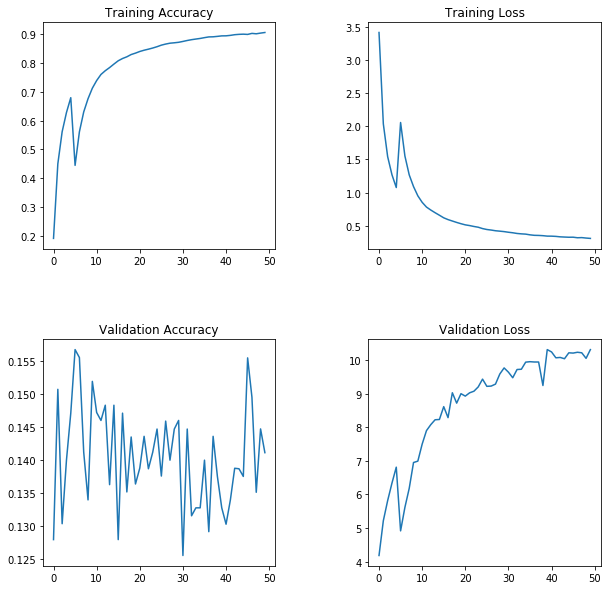

In [139]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
ax.plot(acc)
ax.set_title('Training Accuracy')

ax = fig.add_subplot(2, 2, 2)
ax.plot(loss)
ax.set_title('Training Loss')

ax = fig.add_subplot(2, 2, 3)
ax.plot(val_acc)
ax.set_title('Validation Accuracy')

ax = fig.add_subplot(2, 2, 4)
ax.plot(val_loss)
ax.set_title('Validation Loss')

As we can see from the above plots, the training accuracy is increasing and the loss is decreasing.
The training accuracy is around **90 %** and loss has decreased 3.5 to 0.4.
But the validation accuracy is still not stable and fluctuates around **14%** which is in line with the survey that we had done.
And the validation loss keeps increasing as we train, may be it needs more training where it starts to decrease after hitting a certain threshold.

Or may be the model is over fitted and we have to implement drop outs to reduce the loss, but taking the time left in the project we will not be able to do it, as we will loose the training that we did so far.

Below code is to save the model and it's weight using Yaml, though we have used the model check point to save, this is just to be double sure.

In [197]:
def save_mclass():
    classifier_yaml = classifier.to_yaml()
    with open("mclass.yaml", "w") as yaml_file:
        yaml_file.write(classifier_yaml)
    # serialize weights to HDF5
    classifier.save_weights("mclass.h5")
    print("Saved model to disk")

save_mclass()

Saved model to disk


Below code is to load the saved model.

In [199]:
def load_mclass():
    # load YAML and create model
    yaml_file = open('mclass.yaml', 'r')
    loaded_classifier_yaml = yaml_file.read()
    yaml_file.close()
    loaded_classifier = model_from_yaml(loaded_classifier_yaml)
    # load weights into new model
    loaded_classifier.load_weights("mclass.h5")
    print("Loaded model from disk")
    return loaded_classifier
    
loaded_classifier = load_mclass()

Loaded model from disk


### Test the Model

Lets test the model with some random images from valid folder which are not used for training or testing.

**Though the predicted class is not the right class but if we see the original image and image from predicted class they both look similar.**

In [207]:
#make sure that path_to_file contains the path to the image you want to predict on. 
def identifyBreed(path,loaded_classifier):    
    img = imread(path) 
    img = resize(img,(64,64),mode='constant')
    img = np.expand_dims(img,axis=0)
    
    if(np.max(img)>1):
        img = img/255.0
    
    prediction = loaded_classifier.predict_classes(img)
    
    print("This dog belongs to",class_labels[prediction[0]].split('.')[1],"breed")

In [208]:
identifyBreed('dogImages/valid/001.Affenpinscher/Affenpinscher_00038.jpg',loaded_classifier)

This dog belongs to Belgian_sheepdog breed


In [209]:
identifyBreed('dogImages/valid/021.Belgian_sheepdog/Belgian_sheepdog_01485.jpg',loaded_classifier)

This dog belongs to Poodle breed


In [210]:
identifyBreed('dogImages/valid/124.Poodle/Poodle_07914.jpg',loaded_classifier)

This dog belongs to Black_russian_terrier breed


In [211]:
identifyBreed('dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01855.jpg',loaded_classifier)

This dog belongs to Lakeland_terrier breed


In [212]:
identifyBreed('dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06542.jpg',loaded_classifier)

This dog belongs to Black_and_tan_coonhound breed


In [213]:
display(HTML("<table><tr><th>Affenpinscher</th><th>Belgian sheepdog</th><th>Poodle</th></tr>\
<tr><td><img src='dogImages/valid/001.Affenpinscher/Affenpinscher_00038.jpg'></td>\
<td><img src='dogImages/valid/021.Belgian_sheepdog/Belgian_sheepdog_01485.jpg'></td>\
<td><img src='dogImages/valid/124.Poodle/Poodle_07914.jpg'></td></tr>\
<tr><th>Black Russian Terrier</th><th>Lakeland Terrier</th><th>Black and tan coonhound</th></tr>\
<tr><td><img src='dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01855.jpg'></td>\
<td><img src='dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06542.jpg'></td>\
<td><img src='dogImages/valid/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01775.jpg'></td></tr>\
</table>"))

Affenpinscher,Belgian sheepdog,Poodle
,,
Black Russian Terrier,Lakeland Terrier,Black and tan coonhound
,,


## Integration

In [222]:
def load_bclass():
    # load YAML and create model
    yaml_file = open('model.yaml', 'r')
    loaded_classifier_yaml = yaml_file.read()
    yaml_file.close()
    loaded_classifier = model_from_yaml(loaded_classifier_yaml)
    # load weights into new model
    loaded_classifier.load_weights("model.h5")
#     print("Loaded model from disk")
    return loaded_classifier
    

In [219]:
def isDog(path,loaded_classifier):
    img = imread(path) #make sure that path_to_file contains the path to the image you want to predict on. 
    img = resize(img,(64,64),mode='constant')
    img = np.expand_dims(img,axis=0)

    if(np.max(img)>1):
        img = img/255.0

    prediction = loaded_classifier.predict_classes(img)
    return prediction[0][0]
    

In [220]:
def whichDog(path):
    loaded_bclass = load_bclass()
    loaded_mclass = load_mclass()
    res_binary=isDog(path,loaded_bclass)
    if(res_binary == 0):
        identifyBreed(path,loaded_classifier)
    else:
        print("Provided Image is not of a dog")

In [223]:
whichDog('dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06542.jpg')

Loaded model from disk
This dog belongs to Black_and_tan_coonhound breed


In [225]:
whichDog('test_images/d2.jpg')

Loaded model from disk
This dog belongs to Cavalier_king_charles_spaniel breed


In [226]:
whichDog('test_images/d1.jpg')

Loaded model from disk
This dog belongs to Italian_greyhound breed


In [227]:
whichDog('test_images/h1.jpg')

Loaded model from disk
Provided Image is not of a dog


In [229]:
whichDog('test_images/lemon.jpg')

Loaded model from disk
Provided Image is not of a dog
